### Import Initial Packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pip install pandas_ods_reader

Note: you may need to restart the kernel to use updated packages.


In [3]:
from pandas_ods_reader import read_ods

In [4]:
base_path = "C:/Users/SReed/OneDrive - TRC/Desktop/Springboard/Capstone3/Online_Retail_v2.ods"
sheet_index = 1
df = read_ods(base_path , sheet_index)

In [5]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01T08:26:00,2.55,17850.0,United Kingdom
1,536365.0,71053.0,WHITE METAL LANTERN,6.0,2010-12-01T08:26:00,3.39,17850.0,United Kingdom
2,536365.0,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01T08:26:00,2.75,17850.0,United Kingdom
3,536365.0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01T08:26:00,3.39,17850.0,United Kingdom
4,536365.0,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01T08:26:00,3.39,17850.0,United Kingdom
5,536365.0,22752.0,SET 7 BABUSHKA NESTING BOXES,2.0,2010-12-01T08:26:00,7.65,17850.0,United Kingdom
6,536365.0,21730.0,GLASS STAR FROSTED T-LIGHT HOLDER,6.0,2010-12-01T08:26:00,4.25,17850.0,United Kingdom
7,536366.0,22633.0,HAND WARMER UNION JACK,6.0,2010-12-01T08:28:00,1.85,17850.0,United Kingdom
8,536366.0,22632.0,HAND WARMER RED POLKA DOT,6.0,2010-12-01T08:28:00,1.85,17850.0,United Kingdom
9,536367.0,84879.0,ASSORTED COLOUR BIRD ORNAMENT,32.0,2010-12-01T08:34:00,1.69,13047.0,United Kingdom


In [6]:
#check data types
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity       float64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [7]:
#Check number of unique item descriptions
len(df.Description.unique())

4224

In [8]:
#check number of missing values in each column
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

***

CustomerID is not essential to clustering or time-series analysis, so I am okay with having some null values in this column. I do want to look at the missing descriptions, however.

In [9]:
df[df.Description.isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414.0,22139.0,None,56.0,2010-12-01T11:52:00,0.0,NaN,United Kingdom
1970,536545.0,21134.0,None,1.0,2010-12-01T14:32:00,0.0,NaN,United Kingdom
1971,536546.0,22145.0,None,1.0,2010-12-01T14:33:00,0.0,NaN,United Kingdom
1972,536547.0,37509.0,None,1.0,2010-12-01T14:33:00,0.0,NaN,United Kingdom
1987,536549.0,85226A,None,1.0,2010-12-01T14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199.0,84581.0,None,-2.0,2011-12-07T18:26:00,0.0,NaN,United Kingdom
535326,581203.0,23406.0,None,15.0,2011-12-07T18:31:00,0.0,NaN,United Kingdom
535332,581209.0,21620.0,None,6.0,2011-12-07T18:35:00,0.0,NaN,United Kingdom
536981,581234.0,72817.0,None,27.0,2011-12-08T10:33:00,0.0,NaN,United Kingdom


***

It's unclear how to interpret these transactions with no description. However, they also have no unit price or customer linked to them. Given that I am interested in clustering by description and doing time series based on sales/revenue, I am going to omit them from the data frame below in the Clean Up section.

In [10]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [11]:
#Convert invoice dates to datetime format
df.InvoiceDate = pd.to_datetime(df.InvoiceDate)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  float64       
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 33.1+ MB


### Explored Cancelled Orders

Invoices with a "C" at the front are cancelled orders. Since I don't want to count those in my forecast I am going to convert the invoice numbers to strings and isolate the cancelled orders.

In [13]:
#Convert to string format
df["InvoiceNo"]= df["InvoiceNo"].astype('string')

In [14]:
#Check how many orders were cancelled
len(df[df['InvoiceNo'].str.contains('C')])

9288

9,288 cancellations plus their respective initial orders still leaves 521,897 completed orders to work with. Safe to remove them from the dataframe if they can be identified in order to leave just those orders that have been completed.

In [15]:
#subset to orders with 'C' in the InvoiceNo
cancelled_orders_df = df[df['InvoiceNo'].str.contains('C')]
cancelled_orders_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1.0,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1.0,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556.0,PLASTERS IN TIN CIRCUS PARADE,-12.0,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984.0,PACK OF 12 PINK PAISLEY TISSUES,-24.0,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983.0,PACK OF 12 BLUE PAISLEY TISSUES,-24.0,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [16]:
cancelled_index_list = list(cancelled_orders_df.index)

In [17]:
#Let's see if cancellations are indexed right after the initial order
#create an empty list bc - before cancellation
bc = []

#for each index number in our cancelled order df, subtract one and then append to a new list
for num in cancelled_index_list:
    prior_order = num - 1
    bc.append(prior_order)

In [18]:
#select indexes that occur directly before cancellations.
df.iloc[bc[:6]]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
140,536381.0,21523.0,DOORMAT FANCY FONT HOME SWEET HOME,10.0,2010-12-01 09:41:00,6.75,15311.0,United Kingdom
153,536382.0,22783.0,SET 3 WICKER OVAL BASKETS W LIDS,4.0,2010-12-01 09:45:00,16.95,16098.0,United Kingdom
234,536390.0,85099B,JUMBO BAG RED RETROSPOT,100.0,2010-12-01 10:19:00,1.65,17511.0,United Kingdom
235,C536391,22556.0,PLASTERS IN TIN CIRCUS PARADE,-12.0,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984.0,PACK OF 12 PINK PAISLEY TISSUES,-24.0,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983.0,PACK OF 12 BLUE PAISLEY TISSUES,-24.0,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [19]:
df.iloc[cancelled_index_list[:6]]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1.0,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1.0,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556.0,PLASTERS IN TIN CIRCUS PARADE,-12.0,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984.0,PACK OF 12 PINK PAISLEY TISSUES,-24.0,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983.0,PACK OF 12 BLUE PAISLEY TISSUES,-24.0,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
238,C536391,21980.0,PACK OF 12 RED RETROSPOT TISSUES,-24.0,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


***

Several of the orders right before cancellations are negative quanities themselves.

Comparing even just the first 6 rows in cancellations and their prior orders, we can already see that this will not be a reliable method for filtering out orders that were cancelled.

In [20]:
#create a list of integers that represent the orders/invoice numbers that were later cancelled
cancelled_orders = cancelled_orders_df.InvoiceNo.str.strip('C')
cancelled_orders_list = cancelled_orders.astype(int).to_list()

In [21]:
#Putting the adjustments with InvoiceNo starting with A in a separate df
#Will rejoin df later if I need to incorporate but this will remove rows with invoice starting w/'A'
Adjustments_df = df[df['InvoiceNo'].str.contains('A')]
Adjustments_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299982,A563185,B,Adjust bad debt,1.0,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
299983,A563186,B,Adjust bad debt,1.0,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1.0,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [22]:
len(cancelled_orders_list)

9288

In [23]:
#examine a customer with a cancellation
df[df['CustomerID'] == 16446.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
194354,553573.0,22980.0,PANTRY SCRUBBING BRUSH,1.0,2011-05-18 09:52:00,1.65,16446.0,United Kingdom
194355,553573.0,22982.0,PANTRY PASTRY BRUSH,1.0,2011-05-18 09:52:00,1.25,16446.0,United Kingdom
540421,581483.0,23843.0,"PAPER CRAFT , LITTLE BIRDIE",80995.0,2011-12-09 09:15:00,2.08,16446.0,United Kingdom
540422,C581484,23843.0,"PAPER CRAFT , LITTLE BIRDIE",-80995.0,2011-12-09 09:27:00,2.08,16446.0,United Kingdom


In [24]:
df[df['CustomerID'] == 15098]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
222670,556442.0,22502.0,PICNIC BASKET WICKER SMALL,60.0,2011-06-10 15:22:00,4.95,15098.0,United Kingdom
222680,556444.0,22502.0,PICNIC BASKET WICKER 60 PIECES,60.0,2011-06-10 15:28:00,649.50,15098.0,United Kingdom
222681,C556445,M,Manual,-1.0,2011-06-10 15:31:00,38970.00,15098.0,United Kingdom
222682,556446.0,22502.0,PICNIC BASKET WICKER 60 PIECES,1.0,2011-06-10 15:33:00,649.50,15098.0,United Kingdom
222692,C556448,22502.0,PICNIC BASKET WICKER SMALL,-60.0,2011-06-10 15:39:00,4.95,15098.0,United Kingdom


Cancelled orders are more complicated that I originally thought. As seen above, some sales are manually refunded.

#### Create Identifier

A cancellation will often match its original order in UnitPrice, CustomerID, and StockCode. It will also have the same Quantity but positive rather than negative.
I am going to combine these columns and add it as another column in the dataframe.
I will then try to match this identification string with its cancellation.

In [26]:
#Create identifier by multiplying numerical columns, making it negative to match the cancellation, and then concatenate with the StockCode string
df['Indentifier'] = (df['UnitPrice'] * df['Quantity'] * df['CustomerID'] * -1).astype(str) + df['StockCode'].astype(str)

In [27]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Indentifier
0,536365.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,-273105.085123A
1,536365.0,71053.0,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,-363069.071053.0
2,536365.0,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,-392700.084406B
3,536365.0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,-363069.084029G
4,536365.0,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,-363069.084029E


In [28]:
#do the same thing with the cancellations df
cancelled_orders_df['Identifier'] = (cancelled_orders_df['UnitPrice'] * cancelled_orders_df['Quantity'] * cancelled_orders_df['CustomerID']).astype(str) + cancelled_orders_df['StockCode'].astype(str)
Identifier_list = cancelled_orders_df['Identifier'].to_list()

C:\Users\SReed\AppData\Local\Temp\ipykernel_16204\3849969195.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancelled_orders_df['Identifier'] = (cancelled_orders_df['UnitPrice'] * cancelled_orders_df['Quantity'] * cancelled_orders_df['CustomerID']).astype(str) + cancelled_orders_df['StockCode'].astype(str)


In [29]:
cancelled_orders_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Identifier
141,C536379,D,Discount,-1.0,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-399492.5D
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1.0,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-71196.1500000000135004C
235,C536391,22556.0,PLASTERS IN TIN CIRCUS PARADE,-12.0,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-347450.3999999999722556.0
236,C536391,21984.0,PACK OF 12 PINK PAISLEY TISSUES,-24.0,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-122134.0799999999921984.0
237,C536391,21983.0,PACK OF 12 BLUE PAISLEY TISSUES,-24.0,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-122134.0799999999921983.0


In [30]:
#try to match original order to cancellations base on StcckCode, Quantity, UnitPrice, and CustomerID
possible_matches=df[df['Indentifier'].isin(Identifier_list)]

In [31]:
#drop columns that differ for every row
possible_matches = possible_matches.drop(columns = ['InvoiceNo','InvoiceDate'])

In [32]:
possible_matches

,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Indentifier
8,22632.0,HAND WARMER RED POLKA DOT,6.0,1.85,17850.0,United Kingdom,-198135.0000000000322632.0
47,22632.0,HAND WARMER RED POLKA DOT,6.0,1.85,17850.0,United Kingdom,-198135.0000000000322632.0
55,21071.0,VINTAGE BILLBOARD DRINK ME MUG,6.0,1.06,17850.0,United Kingdom,-113526.021071.0
57,82483.0,WOOD 2 DRAWER CABINET WHITE FINISH,2.0,4.95,17850.0,United Kingdom,-176715.082483.0
72,21071.0,VINTAGE BILLBOARD DRINK ME MUG,6.0,1.06,17850.0,United Kingdom,-113526.021071.0
...,...,...,...,...,...,...,...
541520,84029E,RED WOOLLY HOTTIE WHITE HEART.,4.0,8.29,NaN,United Kingdom,nan84029E
541539,85174.0,S/4 CACTI CANDLES,1.0,10.79,NaN,United Kingdom,nan85174.0
541540,DOT,DOTCOM POSTAGE,1.0,1714.17,NaN,United Kingdom,nanDOT
541829,22083.0,PAPER CHAIN KIT RETROSPOT,6.0,2.95,17581.0,United Kingdom,-311183.7000000000722083.0


I was hoping for closer to 9,000. But there are many repeat customers so it makes sense that many would order the same thing multiple times but only cancel one. Some of them also look like maybe they find a match but are unrelated to cancelled orders, like index 541540 above. There could be many instances of DOTCOM POSTAGE.

That said, it looks like of these possible matches do consitute orders that could have been cancelled. I am going to drop the columns that differ between every row and then drop duplicates and see how many that leaves.

In [34]:
possible_matches.drop_duplicates(inplace=True)
possible_matches

,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Indentifier
8,22632.0,HAND WARMER RED POLKA DOT,6.0,1.85,17850.0,United Kingdom,-198135.0000000000322632.0
55,21071.0,VINTAGE BILLBOARD DRINK ME MUG,6.0,1.06,17850.0,United Kingdom,-113526.021071.0
57,82483.0,WOOD 2 DRAWER CABINET WHITE FINISH,2.0,4.95,17850.0,United Kingdom,-176715.082483.0
290,82494L,WOODEN FRAME ANTIQUE WHITE,12.0,2.55,17850.0,United Kingdom,-546210.082494L
310,22114.0,HOT WATER BOTTLE TEA AND SYMPATHY,4.0,3.95,13448.0,United Kingdom,-212478.4000000000222114.0
...,...,...,...,...,...,...,...
541388,22141.0,CHRISTMAS CRAFT TREE TOP ANGEL,7.0,4.13,NaN,United Kingdom,nan22141.0
541492,23349.0,ROLL WRAP VINTAGE CHRISTMAS,8.0,2.46,NaN,United Kingdom,nan23349.0
541493,23351.0,ROLL WRAP 50'S CHRISTMAS,22.0,2.46,NaN,United Kingdom,nan23351.0
541520,84029E,RED WOOLLY HOTTIE WHITE HEART.,4.0,8.29,NaN,United Kingdom,nan84029E


***

Not perfect, but pretty good. Assuming that a majority of these match on to cancelled orders, that leaves about 2,656 cancelled orders. I will further explore the data to make sure there aren't cancelled outliers that got missed.

***

Ideally the data system would making finding cancelled orders easier. In lieu of that, however, I have still managed to get our orders to about 99.5% accuracy. It should be noted that this does put a limitation on the accuracy of future clustering and forecasting models. Given the large amount of quality data, though, the consequences should be relatively minor.

In [35]:
list_orders_to_delete = list(possible_matches.index)

In [36]:
len(list_orders_to_delete)

6632

### Data Clean Up

In [37]:
df.drop(list_orders_to_delete, axis=0, inplace=True)

In [38]:
#select only rows where there is a value for Description
df = df[~df['Description'].isna()]

In [39]:
df[df['InvoiceNo'].str.contains('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Indentifier
141,C536379,D,Discount,-1.0,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,399492.5D
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1.0,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,71196.1500000000135004C
235,C536391,22556.0,PLASTERS IN TIN CIRCUS PARADE,-12.0,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,347450.3999999999722556.0
236,C536391,21984.0,PACK OF 12 PINK PAISLEY TISSUES,-24.0,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,122134.0799999999921984.0
237,C536391,21983.0,PACK OF 12 BLUE PAISLEY TISSUES,-24.0,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,122134.0799999999921983.0
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144.0,ZINC T-LIGHT HOLDER STARS SMALL,-11.0,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,131444.6123144.0
541541,C581499,M,Manual,-1.0,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,3482245.62M
541715,C581568,21258.0,VICTORIAN SEWING BOX LARGE,-5.0,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,838277.2521258.0
541716,C581569,84978.0,HANGING HEART JAR T-LIGHT HOLDER,-1.0,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,21643.7584978.0


In [40]:
#Remove Cancellations from df. However df still has the intial order that was later cancelled
no_cancel_df = df[~df['InvoiceNo'].str.contains('C')]

In [41]:
#remove invoices that begin with 'A'
no_cancel_df = no_cancel_df[~no_cancel_df['InvoiceNo'].str.contains('A')]

### EDA Part 1

In [42]:
#The item with the most orders. Trying to get a sense of the store.
no_cancel_df.Description.mode()

0    WHITE HANGING HEART T-LIGHT HOLDER
Name: Description, dtype: object

In [43]:
sum(no_cancel_df['Description'] == 'WHITE HANGING HEART T-LIGHT HOLDER')

2315

In [44]:
df_melted = pd.melt(no_cancel_df[['Quantity','UnitPrice']])

<AxesSubplot:xlabel='variable', ylabel='value'>

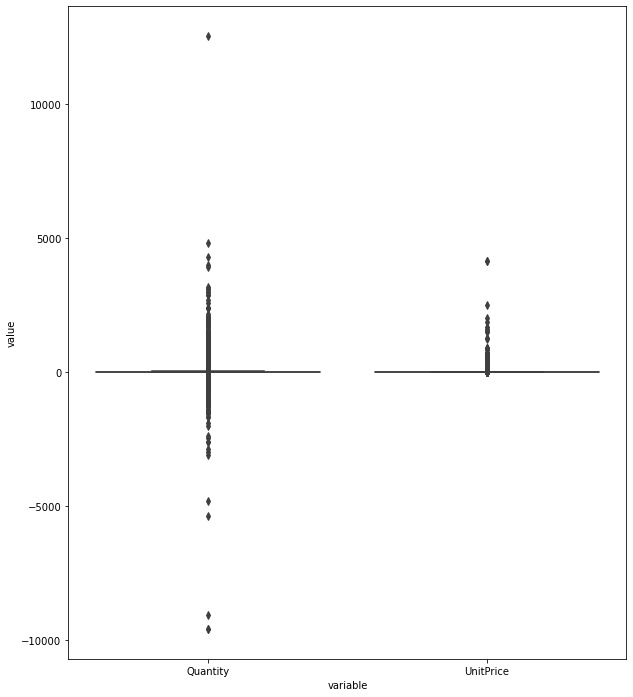

In [45]:
#boxplot of Quantity and UnitPrice
plt.figure(figsize = [10,12])

sns.boxplot(x = 'variable', y = 'value', data = df_melted)

Quantities and unit prices at or below zero?

In [46]:
no_cancel_df[no_cancel_df['Quantity'] <= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Indentifier
7313,537032.0,21275.0,?,-30.0,2010-12-03 16:50:00,0.0,NaN,United Kingdom,nan21275.0
13217,537425.0,84968F,check,-20.0,2010-12-06 15:35:00,0.0,NaN,United Kingdom,nan84968F
13218,537426.0,84968E,check,-35.0,2010-12-06 15:36:00,0.0,NaN,United Kingdom,nan84968E
13264,537432.0,35833G,damages,-43.0,2010-12-06 16:10:00,0.0,NaN,United Kingdom,nan35833G
21338,538072.0,22423.0,faulty,-13.0,2010-12-09 14:10:00,0.0,NaN,United Kingdom,nan22423.0
...,...,...,...,...,...,...,...,...,...
535333,581210.0,23395.0,check,-26.0,2011-12-07 18:36:00,0.0,NaN,United Kingdom,nan23395.0
535335,581212.0,22578.0,lost,-1050.0,2011-12-07 18:38:00,0.0,NaN,United Kingdom,nan22578.0
535336,581213.0,22576.0,check,-30.0,2011-12-07 18:38:00,0.0,NaN,United Kingdom,nan22576.0
536908,581226.0,23090.0,missing,-338.0,2011-12-08 09:56:00,0.0,NaN,United Kingdom,nan23090.0


This data might be useful for some other analysis (e.g. about business inefficiences) but for my purposes I'm going to omit it since it's not relevant to forecasting.

In [47]:
no_cancel_df[no_cancel_df['Quantity'] <= -5000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Indentifier
115818,546152.0,72140F,throw away,-5368.0,2011-03-09 17:25:00,0.0,NaN,United Kingdom,nan72140F
225528,556687.0,23003.0,Printing smudges/thrown away,-9058.0,2011-06-14 10:36:00,0.0,NaN,United Kingdom,nan23003.0
225529,556690.0,23005.0,printing smudges/thrown away,-9600.0,2011-06-14 10:37:00,0.0,NaN,United Kingdom,nan23005.0
225530,556691.0,23005.0,printing smudges/thrown away,-9600.0,2011-06-14 10:37:00,0.0,NaN,United Kingdom,nan23005.0


In [48]:
no_cancel_df = no_cancel_df[no_cancel_df['Quantity'] > 0]

In [49]:
no_cancel_df[no_cancel_df['UnitPrice'] <= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Indentifier
6391,536941.0,22734.0,amazon,20.0,2010-12-03 12:08:00,0.0,NaN,United Kingdom,nan22734.0
6392,536942.0,22139.0,amazon,15.0,2010-12-03 12:08:00,0.0,NaN,United Kingdom,nan22139.0
9302,537197.0,22841.0,ROUND CAKE TIN VINTAGE GREEN,1.0,2010-12-05 14:02:00,0.0,12647.0,Germany,-0.022841.0
14335,537534.0,85064.0,CREAM SWEETHEART LETTER RACK,1.0,2010-12-07 11:48:00,0.0,NaN,United Kingdom,nan85064.0
14336,537534.0,84832.0,ZINC WILLIE WINKIE CANDLE STICK,1.0,2010-12-07 11:48:00,0.0,NaN,United Kingdom,nan84832.0
...,...,...,...,...,...,...,...,...,...
524622,580609.0,22927.0,Amazon,1.0,2011-12-05 11:41:00,0.0,NaN,United Kingdom,nan22927.0
535325,581202.0,23404.0,check,41.0,2011-12-07 18:30:00,0.0,NaN,United Kingdom,nan23404.0
535334,581211.0,22142.0,check,14.0,2011-12-07 18:36:00,0.0,NaN,United Kingdom,nan22142.0
538504,581406.0,46000M,POLYESTER FILLER PAD 45x45cm,240.0,2011-12-08 13:58:00,0.0,NaN,United Kingdom,nan46000M


These also look overwhelmingly extraneous.

In [50]:
no_cancel_df = no_cancel_df[no_cancel_df['UnitPrice'] > 0]

(array([5.23516e+05, 3.13000e+02, 7.40000e+01, 1.50000e+01, 1.40000e+01,
        4.00000e+00, 3.00000e+00, 0.00000e+00, 2.00000e+00, 1.00000e+00]),
 array([1.0000e+00, 4.8090e+02, 9.6080e+02, 1.4407e+03, 1.9206e+03,
        2.4005e+03, 2.8804e+03, 3.3603e+03, 3.8402e+03, 4.3201e+03,
        4.8000e+03]),
 <BarContainer object of 10 artists>)

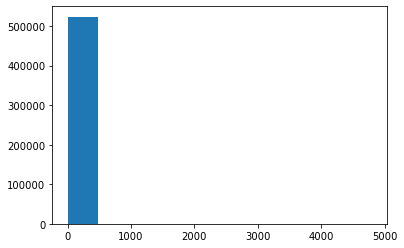

In [51]:
plt.hist(x= no_cancel_df['Quantity'])

In [52]:
no_cancel_df['Sale_Total'] = no_cancel_df['Quantity'] * no_cancel_df['UnitPrice']

In [53]:
df_melted2 = pd.melt(no_cancel_df[['Quantity','UnitPrice', 'Sale_Total']])

<AxesSubplot:xlabel='variable', ylabel='value'>

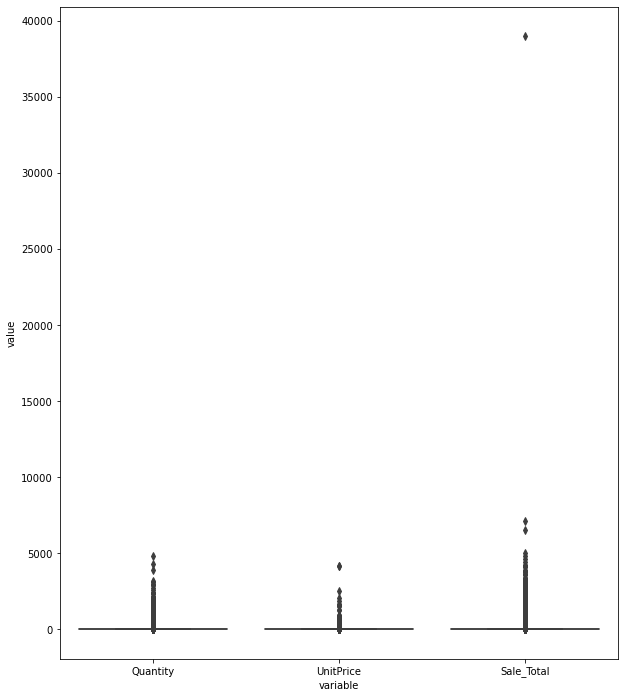

In [54]:
#boxplot of Quantity and UnitPrice
plt.figure(figsize = [10,12])

sns.boxplot(x = 'variable', y = 'value', data = df_melted2)

In [55]:
#check the outlier
no_cancel_df[no_cancel_df['Sale_Total'] > 20000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Indentifier,Sale_Total
222680,556444.0,22502.0,PICNIC BASKET WICKER 60 PIECES,60.0,2011-06-10 15:28:00,649.5,15098.0,United Kingdom,-588369060.022502.0,38970.0


In [56]:
#compare with our cancellations for that same customer
cancelled_orders_df[cancelled_orders_df['CustomerID'] == 15098.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Identifier
222681,C556445,M,Manual,-1.0,2011-06-10 15:31:00,38970.00,15098.0,United Kingdom,-588369060.0M
222692,C556448,22502.0,PICNIC BASKET WICKER SMALL,-60.0,2011-06-10 15:39:00,4.95,15098.0,United Kingdom,-4484106.022502.0


Because this one was manually adjusted and had a different stock code it did not get caught by our identifier. I'll filter this out now.

In [57]:
no_cancel_df = no_cancel_df[no_cancel_df['Sale_Total'] < 20000]

In [58]:
no_cancel_df.Sale_Total.describe()

count    523941.000000
mean         18.771842
std          63.435189
min           0.001000
25%           3.750000
50%           9.900000
75%          17.400000
max        7144.720000
Name: Sale_Total, dtype: float64

(array([5.23393e+05, 3.86000e+02, 7.80000e+01, 4.20000e+01, 2.60000e+01,
        1.00000e+01, 4.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([1.0000000e-03, 7.1447290e+02, 1.4289448e+03, 2.1434167e+03,
        2.8578886e+03, 3.5723605e+03, 4.2868324e+03, 5.0013043e+03,
        5.7157762e+03, 6.4302481e+03, 7.1447200e+03]),
 <BarContainer object of 10 artists>)

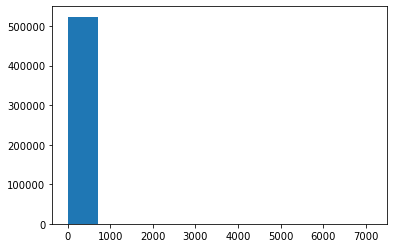

In [59]:
plt.hist(x = no_cancel_df.Sale_Total)

### Word Cloud

In [60]:
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [61]:
text = " ".join(review for review in no_cancel_df.Description.astype(str))

In [62]:
print ("There are {} words in the combination of all cells in column Description.".format(len(text)))

There are 14513916 words in the combination of all cells in column Description.


In [63]:
stopwords = set(STOPWORDS)

In [64]:
stopwords.update(["red","jumbo","blue","white","pink"])

In [65]:
wordcloud = WordCloud(stopwords=stopwords, height = 250).generate(text)

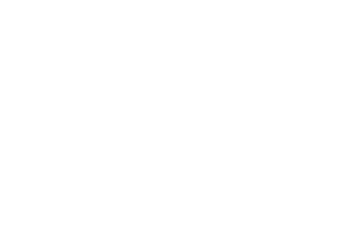

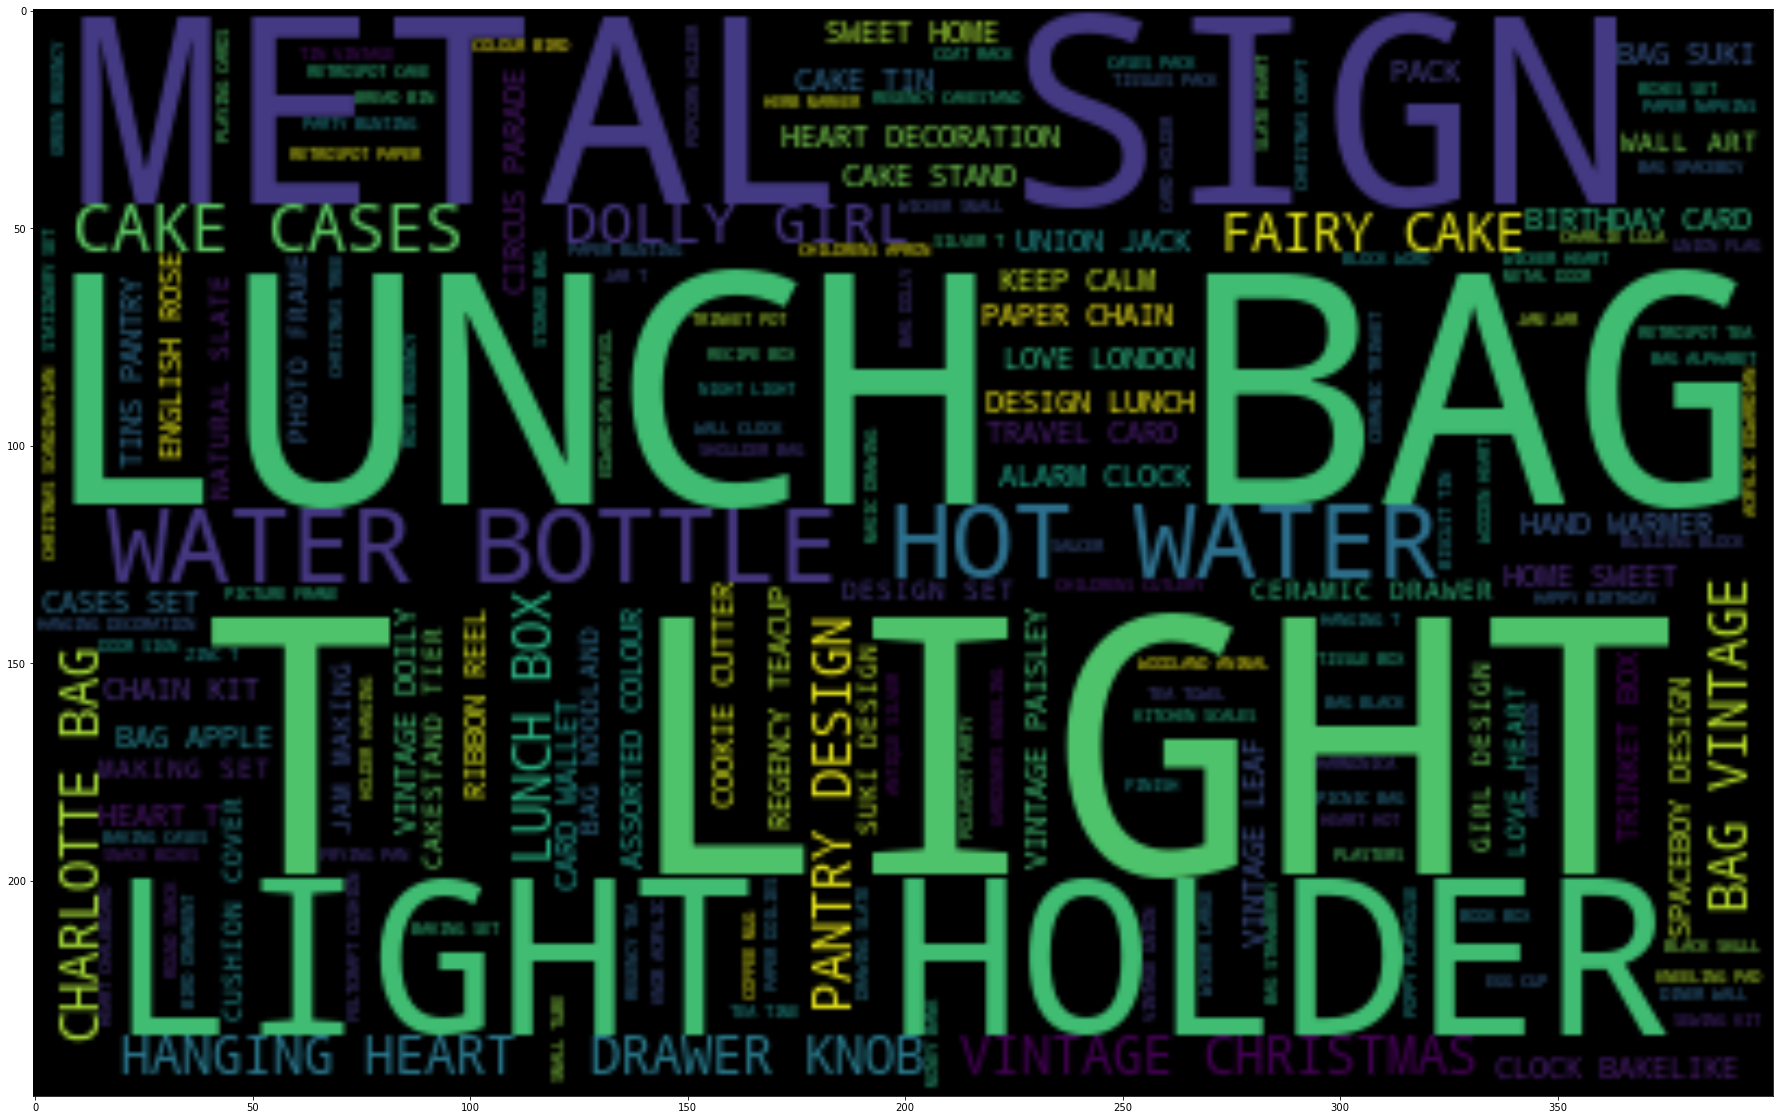

In [66]:
plt.axis("off")
plt.figure(figsize=[40,20])
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')

plt.show()

### Descriptions Explo Cont.

In [67]:
from IPython.display import HTML

In [68]:
description_count = (no_cancel_df.Description.value_counts()
                   .to_frame()
                   .reset_index()
                   .rename(columns = {'index': 'Description', 'Description' : 'count'}))

In [69]:
HTML(description_count.to_html(index=False))

Description,count
WHITE HANGING HEART T-LIGHT HOLDER,2311
JUMBO BAG RED RETROSPOT,2101
REGENCY CAKESTAND 3 TIER,1971
PARTY BUNTING,1614
LUNCH BAG RED RETROSPOT,1522
ASSORTED COLOUR BIRD ORNAMENT,1468
SET OF 3 CAKE TINS PANTRY DESIGN,1369
PACK OF 72 RETROSPOT CAKE CASES,1290
LUNCH BAG BLACK SKULL.,1276
NATURAL SLATE HEART CHALKBOARD,1260


list of stop words in descriptions

stopwords.update([“set”, “s/2”, “s/4”, “s/6”, “s/12”, “s/15”, “set/4”, “set/20”, “set/6”, “set/3”, “set/2”, “set/10”, “set3”, “of4”, “box/12”, “pack/12”, “PC”, “piece”, “pack” ,”of”, “small”, “medium”, “large”, "jumbo" ,"blue" ,”pink", "white", "red", “green”, “black”,  “in”, “of”, “the”, “+”, “&”])

In [70]:
no_cancel_df[no_cancel_df['Description'] == 'Manual']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Indentifier,Sale_Total
2239,536569.0,M,Manual,1.0,2010-12-01 15:35:00,1.25,16274.0,United Kingdom,-20342.5M,1.25
2250,536569.0,M,Manual,1.0,2010-12-01 15:35:00,18.95,16274.0,United Kingdom,-308392.3M,18.95
6798,536981.0,M,Manual,2.0,2010-12-03 14:26:00,0.85,14723.0,United Kingdom,-25029.1M,1.70
7976,537077.0,M,Manual,12.0,2010-12-05 11:59:00,0.42,17062.0,United Kingdom,-85992.48M,5.04
8530,537137.0,M,Manual,36.0,2010-12-05 12:43:00,0.85,16327.0,United Kingdom,-499606.19999999995M,30.60
...,...,...,...,...,...,...,...,...,...,...
526015,580645.0,M,Manual,1.0,2011-12-05 13:11:00,219.50,17857.0,United Kingdom,-3919611.5M,219.50
526018,580646.0,M,Manual,800.0,2011-12-05 13:13:00,0.25,17857.0,United Kingdom,-3571400.0M,200.00
530876,580884.0,M,Manual,1.0,2011-12-06 12:21:00,0.85,15907.0,United Kingdom,-13520.949999999999M,0.85
531432,580956.0,M,Manual,4.0,2011-12-06 14:23:00,1.25,17841.0,United Kingdom,-89205.0M,5.00


In [71]:
#Since 'Manual' sales entries don't give us info about category I am going to exclude them
no_cancel_df = no_cancel_df[no_cancel_df['Description'] != 'Manual']

### Tidy up DF

In [72]:
tidy_df = no_cancel_df.drop(columns = ['Indentifier'])

In [73]:
#set the order time as the index
tidy_df.set_index('InvoiceDate', inplace = True)

In [74]:
monthly_sales = tidy_df.resample('M').sum()

In [75]:
y = monthly_sales['Sale_Total']

In [76]:
monthly_sales.index[0:12]

DatetimeIndex(['2010-12-31', '2011-01-31', '2011-02-28', '2011-03-31',
               '2011-04-30', '2011-05-31', '2011-06-30', '2011-07-31',
               '2011-08-31', '2011-09-30', '2011-10-31', '2011-11-30'],
              dtype='datetime64[ns]', name='InvoiceDate', freq='M')

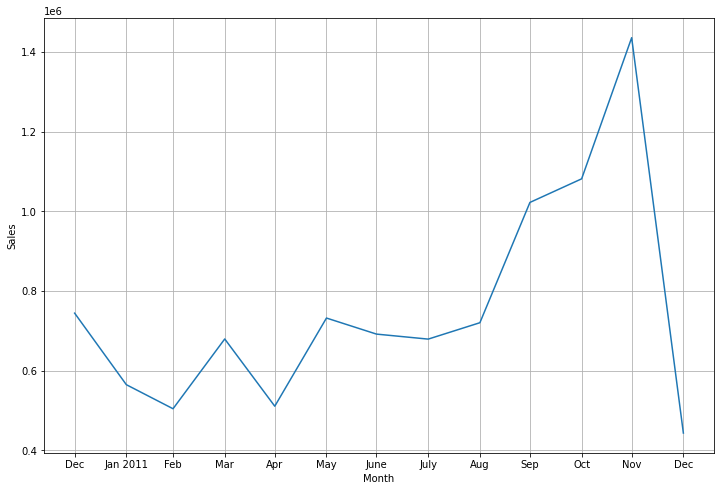

In [77]:
fig, ax = plt.subplots()

sns.lineplot(x = monthly_sales.index, y = y)
fig.set_size_inches(12, 8)
plt.grid()
plt.xlabel('Month')
plt.ylabel('Sales')
ax.set_xticks(monthly_sales.index)
ax.set_xticklabels(['Dec', 'Jan 2011', 'Feb', 'Mar',
                   'Apr', 'May', 'June', 'July', 'Aug', 'Sep','Oct', 'Nov', 'Dec'])
plt.show()

In [78]:
weekly_sales = tidy_df.resample('W').sum()

(array([14948., 14955., 14962., 14969., 14976., 14983., 14990., 14997.,
        15004., 15011., 15018., 15025., 15032., 15039., 15046., 15053.,
        15060., 15067., 15074., 15081., 15088., 15095., 15102., 15109.,
        15116., 15123., 15130., 15137., 15144., 15151., 15158., 15165.,
        15172., 15179., 15186., 15193., 15200., 15207., 15214., 15221.,
        15228., 15235., 15242., 15249., 15256., 15263., 15270., 15277.,
        15284., 15291., 15298., 15305., 15312., 15319.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text

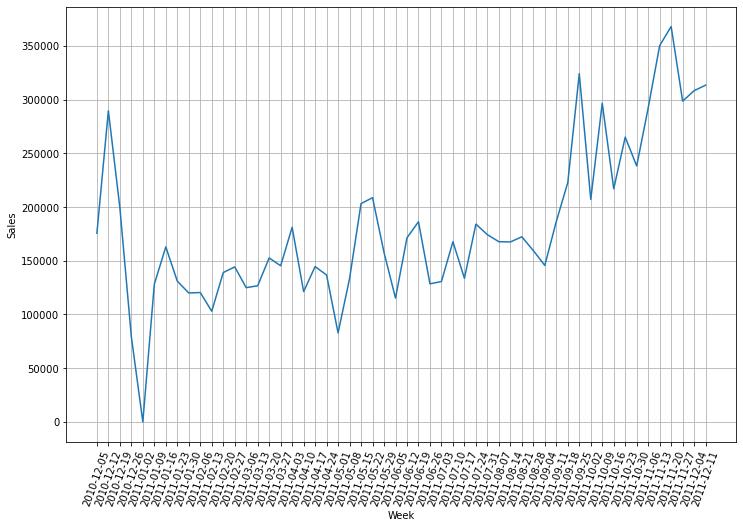

In [79]:
fig, ax = plt.subplots()

sns.lineplot(x = weekly_sales.index, y = weekly_sales.Sale_Total)
fig.set_size_inches(12, 8)
plt.grid()
plt.xlabel('Week')
plt.ylabel('Sales')
ax.set_xticks(weekly_sales.index)
plt.xticks(rotation = 70)

### Clean up text in descriptions

In [80]:
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.tokenize import WhitespaceTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SReed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SReed\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\SReed\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [81]:
stop_words = set(stopwords.words('english'))

stop_words.update([ "set", "s/2", "s/4", "s/6", "s/12", "s/15", "set/4", "set/20", "set/6", "set/3", "set/2", "set/10", "set3", "of4", "box/12", "pack/12", "PC", "piece", "pack" , "small", "medium" , "large", "jumbo" ,"blue" , "pink" , "white", "red", "green", "black",  "in", "of", "+", "&"])
print(stop_words)

{"don't", 'theirs', 'an', "you'll", 'its', 'under', 'set/4', 'weren', 'for', "couldn't", 'mustn', 'pack', 'small', 'ours', 'more', 'how', 'once', 'didn', "it's", 'there', 'you', 'above', 'he', "isn't", 'ma', 'most', 'again', 'hadn', 'should', 'be', 'o', 'shouldn', 'own', 'hers', 'am', 'itself', 'so', 'wouldn', 'now', 'doing', 'same', 'couldn', 's/4', 'their', 'very', 'red', 'by', 'set', 'can', 'y', 'set/10', "hadn't", 'off', 'aren', 'box/12', 'set/3', 'with', 'been', 'are', 'we', 'll', 'this', 'no', 'm', "shan't", 'himself', "shouldn't", 'will', 'my', 'down', 'wasn', 'has', 'herself', 'through', 'themselves', 'set3', 'on', 'won', 're', 's/2', 'they', "you'd", 'set/2', 'myself', 'me', 'if', "mustn't", "should've", 'where', 'nor', 'up', 'was', "she's", 'set/20', 'but', 'as', 'were', 'jumbo', 'only', "haven't", 'between', "doesn't", 'both', 'being', '+', 'of4', 'about', "didn't", 'to', 's/6', "won't", 'while', 'until', 'what', 'set/6', 'mightn', 'some', 'green', 'those', "you've", 'into',

In [82]:
def clean_text(text):
    """
    Summary: turns text input string into list of cleaned word tokens
    
    Arguments:
        text: str of text
    
    Returns:
        lemmatized_words: str, lemmatized words from original text after cleaning
    """
    
    # remove numbers
    clean_text = re.sub(r'[0-9]+', '', text)
    
    # remove punctuation
    clean_text = re.sub(r'[^\w\s]', '', clean_text)
    
    # convert everything to lowercase
    clean_text = clean_text.lower()
    
    # tokenize
    wt = WhitespaceTokenizer()
    words = wt.tokenize(clean_text)
    
    # remove stop words
    cleaned_words = []
    for w in words:
        if w not in stop_words:
            cleaned_words.append(w)
            
    # lemmatize words
    wnl = WordNetLemmatizer()
    wnl_lemmatized_tokens = []
    for token in cleaned_words:
        wnl_lemmatized_tokens.append(wnl.lemmatize(token))
    
    lemmatized_words = ' '.join(wnl_lemmatized_tokens)
    
    return lemmatized_words

In [83]:
tidy_df['cleaned_description'] = tidy_df['Description'].apply(lambda x: clean_text(x))
tidy_df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Sale_Total,cleaned_description
InvoiceDate,,,,,,,,,
2010-12-01 08:26:00,536365.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2.55,17850.0,United Kingdom,15.30,hanging heart tlight holder
2010-12-01 08:26:00,536365.0,71053.0,WHITE METAL LANTERN,6.0,3.39,17850.0,United Kingdom,20.34,metal lantern
2010-12-01 08:26:00,536365.0,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2.75,17850.0,United Kingdom,22.00,cream cupid heart coat hanger
2010-12-01 08:26:00,536365.0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,3.39,17850.0,United Kingdom,20.34,knitted union flag hot water bottle
2010-12-01 08:26:00,536365.0,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,3.39,17850.0,United Kingdom,20.34,woolly hottie heart


In [84]:
tidy_df = tidy_df.drop(columns = ['Description'])

### Export DataFrame

In [85]:
#export tidy dataframe
tidy_df.to_csv('./tidy_df.csv', index= False)